# Milestone 2

# Introduction
## Author
Delfi Kusuma Wardhani

H8 FTDS - 002

## Dataset Description

Dataset dapat diunduh di Kaggle : https://www.kaggle.com/sakshigoyal7/credit-card-customers

Dataset ini terdiri dari data 10.000 pelanggan dengan informasi usia, gaji, status_perkawinan, batas kartu kredit, kategori kartu kredit, dan yang lainnya.

## Business Problem : Customer Retention
Permasalahan yang akan dibahas pada notebook ini adalah bertambah banyaknya nasabah yang meninggalkan layanan kartu kredit pada sebuah bank. Pihak bank akan sangat menghargai jika seorang nasabah dapat diprediksi apakah mereka akan berhenti berlangganan atau beralih ke bank lain (churn) sehingga pihak bank dapat secara proaktif mendatangi nasabah untuk memberikan layanan yang lebih baik dan mengubah keputusan pelanggan ke arah yang berlawanan.

## Objective
Pada project kali ini kami akan mencoba membuat sebuah model untuk memprediksi apakah seorang nasabah pengguna kartu kredit akan tetap berlangganan atau beralih dan berhenti berlangganan. Akan digunakan beberapa model machine learning yang akan dilatih agar dapat memprediksi secara akurat. Selanjutnya dari model tersebut akan dipilih salah satu yang dapat memprediksi lebih baik dibanding model lainnya.

# Import Library

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Load Data & EDA
import pandas as pd 
import numpy as np
import os
import urllib.request
import tarfile

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Training Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

# Save Model
import joblib

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


# Data Loading

In [3]:
# Download Dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/delfikw94/Dataset/main/"
BANK_PATH = os.path.join("cc")
BANK_URL = DOWNLOAD_ROOT + "cc/BankChurners.tgz"

# Fetching function
def fetch_cc_data(bank_url=BANK_URL, bank_path=BANK_PATH):
    if not os.path.isdir(bank_path):
        os.makedirs(bank_path)
    tgz_path = os.path.join(bank_path, "BankChurners.tgz")
    urllib.request.urlretrieve(bank_url, tgz_path)
    bank_tgz = tarfile.open(tgz_path)
    bank_tgz.extractall(path=bank_path)
    bank_tgz.close()

In [5]:
# Fetch to the directory
fetch_cc_data() 

In [71]:
# Function for loading the dataset
def load_cc_data(bank_path=BANK_PATH):
    csv_path = os.path.join(bank_path, "BankChurners.csv")
    return pd.read_csv(csv_path)

# Load the data and copy to other variables 
data = load_cc_data()
df = data.copy()
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Data Cleaning

In [8]:
# Menampilkan jumlah missing value dan duplikasi data
print('Missing value :','\n', df.isnull().sum())
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Duplicated data :  0


In [73]:
# Merubah nama kolom agar lebih mudah dalam penulisan pada notebook ini
df.rename(columns={ 'Total_Relationship_Count' : 'Rel_count',
                    'Months_Inactive_12_mon' : 'Months_inactive',
                    'Contacts_Count_12_mon' : 'Contacts_count',
                    'Total_Revolving_Bal' : 'revolving',
                    'Avg_Open_To_Buy' : 'avg_open',
                    'Total_Amt_Chng_Q4_Q1' : 'amount_change',
                    'Total_Ct_Chng_Q4_Q1' : 'ct_change',
                    'Avg_Utilization_Ratio' : 'util_ratio'}, inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [74]:
# Mnentukan CLIENTNUM sebagai index
df = df.set_index('CLIENTNUM')

In [11]:
# Menampilkan unique value untuk setiap kolomnya
for col in df.columns:
  print(col,"==>",df[col].unique())

Attrition_Flag ==> ['Existing Customer' 'Attrited Customer']
Customer_Age ==> [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender ==> ['M' 'F']
Dependent_count ==> [3 5 4 2 0 1]
Education_Level ==> ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ==> ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ==> ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ==> ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book ==> [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Rel_count ==> [5 6 4 3 2 1]
Months_inactive ==> [1 4 2 3 6 0 5]
Contacts_count ==> [3 2 0 1 4 5 6]
Credit_Limit ==> [12691.  8256.  3418. ...  5409.  5281. 10388.]
revolving ==> [ 777  864    0 ...  534  476 2241]
avg_open ==> [11914.  7392.  3418.

Terdapat nilai 'Unknown' pada feature Education_Level, Marital_Status, dan Income_Category. Kita dapat menganggap bahwa nilai Unknown ini merupakan sebuah missing value

In [75]:
df[df['Education_Level']=='Unknown']

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032


Terdapat 1519 data customer dengan nilai Education_Level : 'Unknown'.

Selanjutnya nilai ini akan dirubah dengan nilai terbanyak (modus) dari feature tersebut

In [76]:
# Mengganti nilai unknown pada Education level dengan nilai modus
df.replace({'Education_Level': 'Unknown'}, df['Education_Level'].mode()[0], inplace=True)

In [77]:
df[df['Marital_Status']=='Unknown']

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
714885258,Existing Customer,44,M,4,Graduate,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747551658,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,5,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
719848008,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
718372458,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,3,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461


Terdapat 749 data dengan nilai 'Marital_Status' : 'Unknown'

Kemudian sama dengan metode sebelumnya, nilai yang unknown akan diganti dengan nilai terbanyak dari feature ini

In [78]:
# Mengganti nilai unknown pada Marital Status dengan nilai modus
df.replace({'Marital_Status': 'Unknown'}, df['Marital_Status'].mode()[0], inplace=True)

In [79]:
df[df['Income_Category']=='Unknown']

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000


Beda halnya dengan kedua feature sebelumnya, untuk feature Income Category yang memiliki nilai Unknown akan kita lihat terlebih dahulu kategori dari kartu kreditnya

In [80]:
ic = df[df['Income_Category']=='Unknown']
ic.Card_Category.value_counts()

Blue        1045
Silver        53
Gold           9
Platinum       5
Name: Card_Category, dtype: int64

In [81]:
blu = df[df['Card_Category']=='Blue']
blu['Income_Category'].value_counts()

Less than $40K    3403
$40K - $60K       1675
$80K - $120K      1395
$60K - $80K       1273
Unknown           1045
$120K +            645
Name: Income_Category, dtype: int64

Untuk feature Income_Category yang bernilai Unknown umumnya memiliki kartu kredit kategori Blue, kemudian dari pemilik kartu kredit Blue itu sendiri kebanyakan pendapatannya dibawah 40K. Oleh karena itu, feature Income_Category yang bernilai Unknown tadi akan diganti dengan pendapatan kurang dari 40K

In [82]:
# Mengganti nilai unknown pada Income Category dengan nilai 'Less than $40K'
df.replace({'Income_Category': 'Unknown'}, 'Less than $40K' , inplace=True)

In [20]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [21]:
# Menampilkan 5 baris pertama dataset
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Data sudah siap untuk dieksplorasi

# Exploratory Data Analysis (EDA)

Pertama-tama mari kita lihat jumlah data nasabah yang beralih (Attrited Customer) dan yang stay (Existing Customer) pada dataset ini

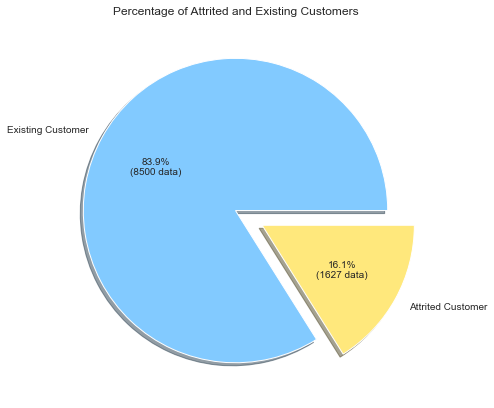

In [22]:
# Fungsi untuk menampilkan jumlah data sebenarnya ke dalam pie chart
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} data)".format(pct, absolute)
    
colors = ["#82CAFF", "#FFE87C"]
labels = df['Attrition_Flag'].unique()
explode=[0,0.2]

# Menampilkan pie chart
plt.figure(figsize=(10,7))
plt.title('Percentage of Attrited and Existing Customers')
plt.pie(df['Attrition_Flag'].value_counts(), autopct=lambda pct: func(pct, df['Attrition_Flag'].value_counts()), 
        colors=colors, explode=explode, shadow=True, labels=labels)
plt.show()

Hanya terdapat 1627 data (16,1%) nasabah yang beralih, berbeda jauh dibandingkan dengan nasabah tetap yang berjumlah 8500 data.

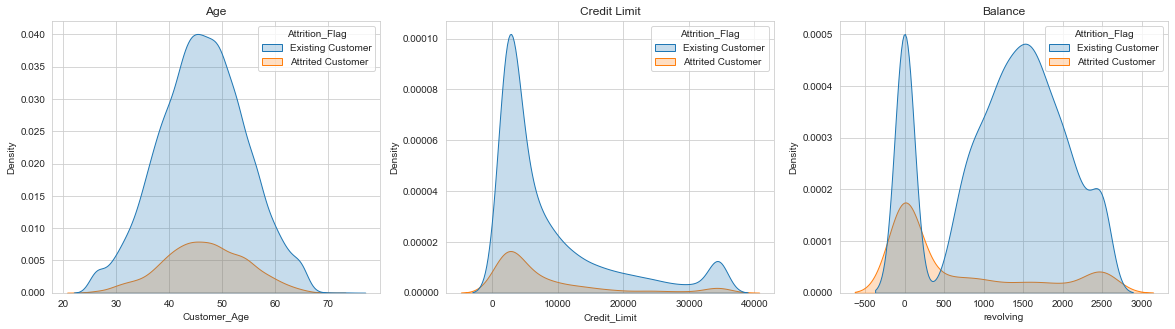

In [23]:
# Menampilkan distribusi data usia, limit kartu kredit, dan total saldo
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Age')
sns.kdeplot(data=df, x='Customer_Age', hue='Attrition_Flag', fill=True)
plt.subplot(1,3,2)
plt.title('Credit Limit')
sns.kdeplot(data=df, x='Credit_Limit', hue='Attrition_Flag', fill=True)
plt.subplot(1,3,3)
sns.kdeplot(data=df, x='revolving', hue='Attrition_Flag', fill=True)
plt.title('Balance')
plt.show()

- Rata-rata pengguna kartu kredit adalah nasabah yang berusia 40-50 tahun
- Nasabah yang beralih cenderung nasabah dengan limit kartu kredit rendah, terdapat sejumlah nasabah dengan limit kartu kredit tinggi tergolong sebagai nasabah tetap
- Nasabah yang beralih pada umumnya memiliki jumlah saldo negatif (belum membayar tagihan sebelumnya)

In [92]:
df['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

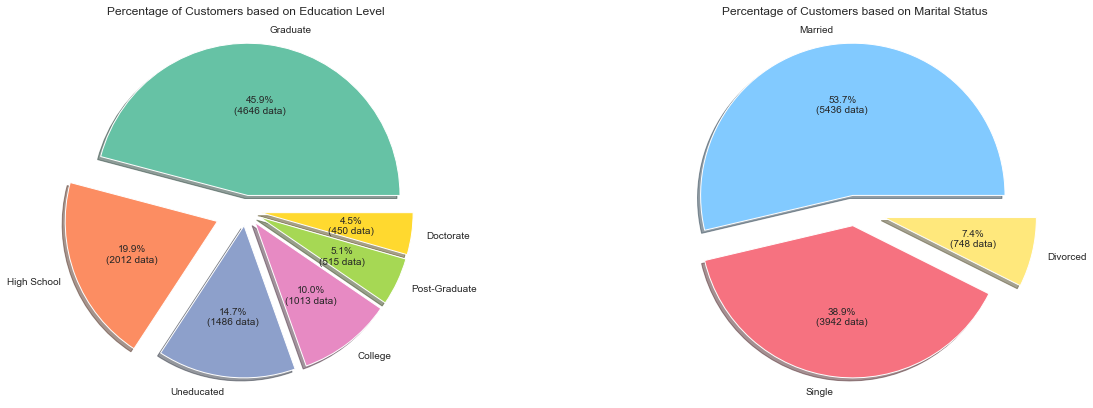

In [93]:
# Variabel yang digunakan untuk pie chart
colors1 = sns.color_palette('Set2')[0:6]
colors = ["#82CAFF","#F67280", "#FFE87C"]
labels1 = ['Graduate', 'High School', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
labels = df['Marital_Status'].unique()
explode1=[0.1,0.2,0.1,0.1,0.1,0.1]
explode=[0.1,0.1,0.2]

# Menampilkan 2 buah pie chart
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Percentage of Customers based on Education Level')
plt.pie(df['Education_Level'].value_counts(), autopct=lambda pct: func(pct, df['Education_Level'].value_counts()), 
        colors=colors1, labels=labels1, shadow=True, explode=explode1)

plt.subplot(1,2,2)
plt.title('Percentage of Customers based on Marital Status')
plt.pie(df['Marital_Status'].value_counts(), autopct=lambda pct: func(pct, df['Marital_Status'].value_counts()),
        colors=colors,labels=labels, shadow=True, explode=explode)
plt.show()

- Nasabah pengguna kartu kredit memiliki beragam latar belakang pendidikan. Jumlah pelanggan terbanyak datang dari orang dengan pendidikan sarjana (Graduate)
- Pengguna kartu kredit yang sudah menikah hampir sama banyaknya dengan yang belum/sudah tidak menikah

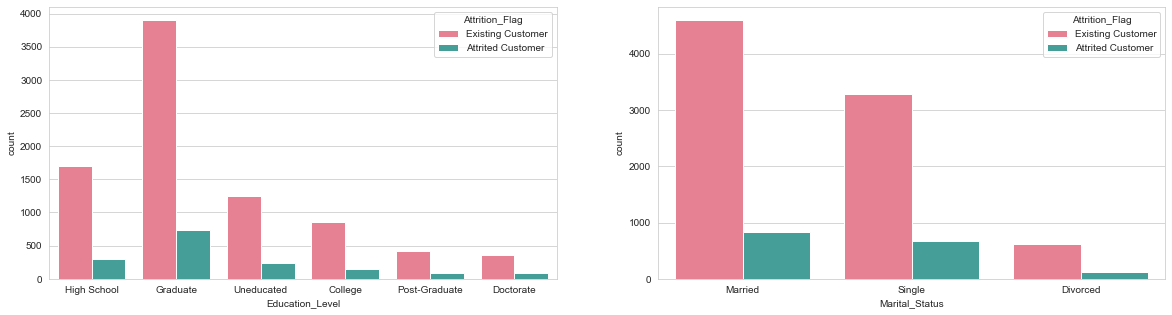

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="Education_Level", data=df,
                   hue="Attrition_Flag", palette='husl')

plt.subplot(1,2,2)
sns.countplot(x="Marital_Status", data=df,
                   hue="Attrition_Flag", palette='husl')
plt.show()

- Pihak bank dapat lebih fokus untuk memberi layanan khusus kepada nasabah dengan latar belakang pendidikan 'Graduate' agar tidak beralih. 
- Status pernikahan nampaknya tidak memiliki pengaruh yang signifikan terhadap loyal atau tidaknya seorang nasabah. Dilihat dari jumlah nasabah lajang yang beralih hampir sama banyaknya dengan nasabah pengguna kartu kredit yang sudah menikah

In [89]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

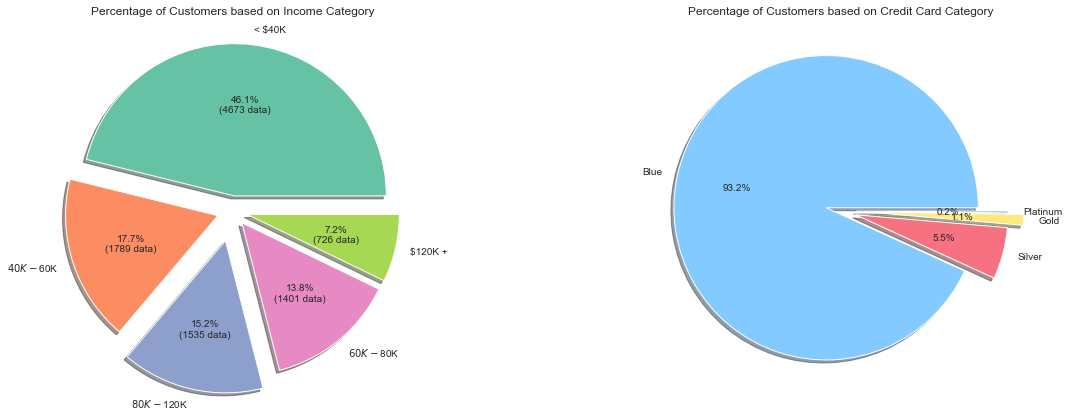

In [90]:
colors1 = sns.color_palette('Set2')[0:5]
labels1 = ['< $40K','$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
explode1=[0.1,0.1,0.2,0.1,0.1]
colors = ["#82CAFF","#F67280", "#FFE87C", "#3EB489"]
labels = ["Blue", "Silver","Gold","Platinum"]
explode=[0.1,0.1,0.2,0.1]

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Percentage of Customers based on Income Category')
plt.pie(df['Income_Category'].value_counts(), autopct=lambda pct: func(pct, df['Income_Category'].value_counts()), shadow=True, 
        colors=colors1, explode=explode1, labels=labels1)

plt.subplot(1,2,2)
plt.title('Percentage of Customers based on Credit Card Category')
plt.pie(df['Card_Category'].value_counts(), autopct="%.1f%%",labels=labels, shadow=True, 
        colors=colors, explode=explode)
plt.show()

- Lebih dari 90% nasabah kartu kredit adalah pemegang kartu kategori Blue

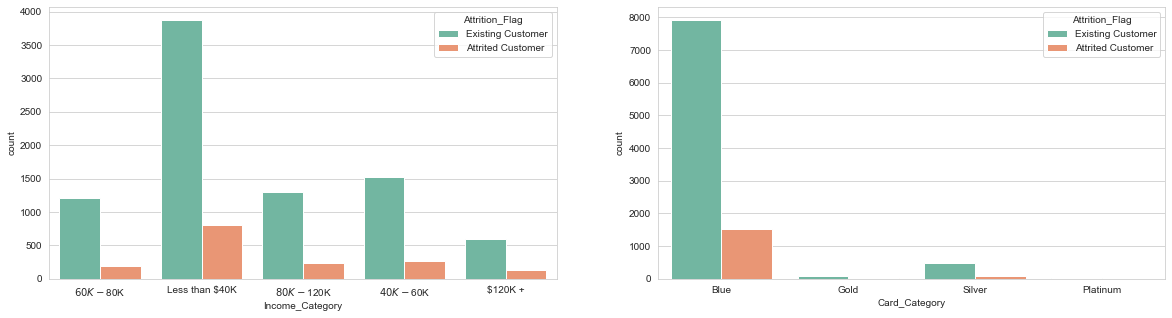

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="Income_Category", data=df,
                   hue="Attrition_Flag", palette='Set2')

plt.subplot(1,2,2)
sns.countplot(x="Card_Category", data=df,
                   hue="Attrition_Flag", palette='Set2')
plt.show()

- Pada umumnya, nasabah pengguna kartu kredit adalah nasabah dengan penghasilan per tahunnya di bawah $40K
- Jumlah nasabah kartu kredit dengan kategori Blue adalah yang paling banyak dibandingkan dengan jumlah nasabah pemegang jenis kartu lainnya
- Untuk kategori Gold, dan Platinum, jumlah nasabahnya tidak banyak tetapi pada umumnya mereka lebih loyal

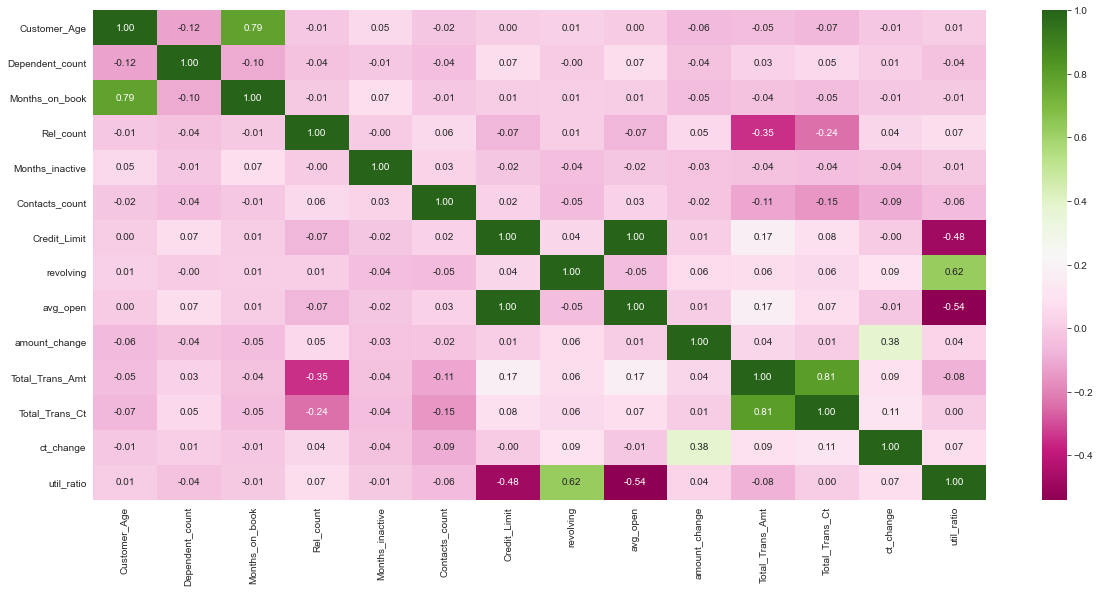

In [28]:
# Menampilkan grafik correlation heatmap
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="PiYG")
plt.show()

Terdapat beberapa feature numerik yang memiliki korelasi tinggi dengan feature lainnya. Untuk menghindari multicolinearity, akan dilakukan analisa terhadap VIF Score di proses data preprocessing sebelum melakukan latihan pemodelan

# Data Preprocessing
Pertama-tama akan dilakukan encoding untuk data categorical agar feature dapat diikutsertakan ke dalam training model

## Encoding Categorical Data

In [29]:
# Encode kolom target dari proses klasifikasi
encode = LabelEncoder()
df['Attrition_Flag'] = encode.fit_transform(df['Attrition_Flag']) 

In [30]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,0,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


Pertama-tama akan kita encode terlebih dahulu kolom target pada dataset ini yaitu 'Attrition_Flag'. Output dari proses encoder ini adalah :
- 1 : Existing Customer (nasabah tetap)
- 0 : Attrited Customer (nasabah beralih)

Memisahkan data categorical dari dataset untuk di encode. Output dari fungsi ColumnTransformer di bawah ini adalah berupa numpy array. Kemudian nantinya array ini akan dimasukkan lagi ke dalam dataframe.

In [31]:
cat_data = df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

In [32]:
cat_data

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
CLIENTNUM,,,,,
768805383,M,High School,Married,$60K - $80K,Blue
818770008,F,Graduate,Single,Less than $40K,Blue
713982108,M,Graduate,Married,$80K - $120K,Blue
769911858,F,High School,Married,Less than $40K,Blue
709106358,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
772366833,M,Graduate,Single,$40K - $60K,Blue
710638233,M,Graduate,Divorced,$40K - $60K,Blue
716506083,F,High School,Married,Less than $40K,Blue


In [33]:
df = df.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1)

In [34]:
# Encoding seluruh categorical feature
ct = ColumnTransformer([
                ('sex', OrdinalEncoder(dtype=int),['Gender']),
                ('edu', OrdinalEncoder(dtype=int),['Education_Level']),
                ('marriage', OrdinalEncoder(dtype=int),['Marital_Status']),
                ('income', OrdinalEncoder(dtype=int),['Income_Category']),
                ('card', OrdinalEncoder(dtype=int),['Card_Category'])    
                ]   
)
cat_data = ct.fit_transform(cat_data)

In [35]:
# Input kembali array hasil encoding ke dalam dataset
df.reset_index(inplace=True)
cat = pd.DataFrame(cat_data, columns = ['A','B','C','D','E'])

df['Gender'] = cat['A']
df['Education_Level'] = cat['B']
df['Marital_Status'] = cat['C']
df['Income_Category'] = cat['D']
df['Card_Category'] = cat['E']


In [36]:
df.set_index(['CLIENTNUM'], inplace=True)
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,1,2,0
818770008,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,2,4,0
713982108,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,1,3,0
769911858,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,1,4,0
709106358,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,2,2,1,0
710638233,0,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,2,0,1,0
716506083,0,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,3,1,4,0


Kini seluruh feature pada dataset sudah berbentuk numerik

## Multicolinearity Detection

Untuk pengecekan nilai variance inflation factor, dikarenakan rata-rata korelasi antar feature-nya cukup tinggi, digunakan batas VIF score = 10

In [37]:
warnings.filterwarnings("ignore")

# Menggunakan variance_inflation_factor (VIF) untuk mendeteksi adanya multicolinearity
vif_data = pd.DataFrame()
vif_data['features'] = df.columns

vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,features,VIF
0,Attrition_Flag,9.895885
1,Customer_Age,77.454482
2,Dependent_count,4.091215
3,Months_on_book,56.450354
4,Rel_count,7.987172
5,Months_inactive,6.299316
6,Contacts_count,5.806980
7,Credit_Limit,inf
8,revolving,inf
9,avg_open,inf


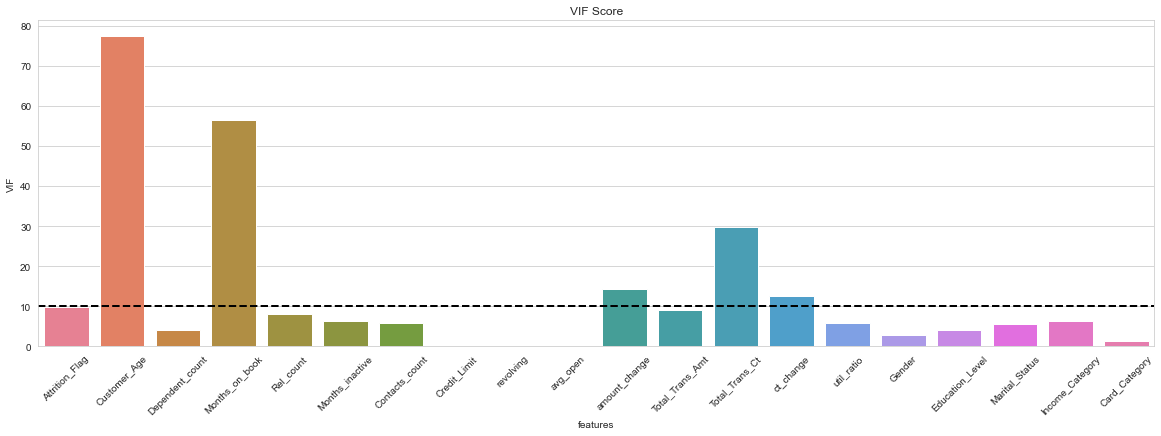

In [38]:
# Grafik VIF Score dengan batas = 10
plt.figure(figsize=(20,6))
sns.barplot(data=vif_data, x='features', y='VIF', palette='husl')
plt.axhline(10, color='black', linestyle='dashed', linewidth=2)
plt.title('VIF Score')
plt.xticks(rotation=45)
plt.show()

Dari 19 feature terdapat 5 feature yang memiliki VIF score di atas batas, sehingga kemungkinan dataset ini dapat direduksi menjadi 14-15 dimensi

## Data Split

In [39]:
# Memisahkan feature dan target
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [40]:
# Membagi dataset menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

print("Total data train : ", len(X_train))
print("Total data test  : ", len(X_test))

Total data train :  8101
Total data test  :  2026


## Pipelines (Scale, PCA, Model Definition)
Model machine learning yang akan kita gunakan disini adalah Random Forest Classifier, Logistic Regression, dan SVM. Kemudian dibuat pipeline untuk masing-masing model yang berisi fungsi scaler, PCA untuk mereduksi dimensi, dan pendefinisian model itu sendiri

In [41]:
# Membuat pipeline untuk proses modelling 
pipe_rf = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('pca',PCA(n_components=0.95)),
    ('rf',RandomForestClassifier(n_estimators=200))])

pipe_lr = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('pca',PCA(n_components=0.95)),
    ('lr',LogisticRegression(C=0.5))])

pipe_svm = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('pca',PCA(n_components=0.95)),
    ('svm',SVC(kernel='poly', C=0.5))])

# Model Training & Evaluation

In [42]:
# Random Forest
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('rf', RandomForestClassifier(n_estimators=200))])

In [43]:
# Logistic Regression
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('lr', LogisticRegression(C=0.5))])

In [44]:
# SVM
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=0.5, kernel='poly'))])

In [45]:
# Menampilkan jumlah dimensi hasil reduksi dimensi dari PCA
components = pipe_rf.named_steps["pca"].n_components_
print('Jumlah dimensi hasil reduksi:', components, 'dimensi')

Jumlah dimensi hasil reduksi: 15 dimensi


## Training Evaluation

In [46]:
# Random Forest
rf_pred = pipe_rf.predict(X_train)
accu_rf = accuracy_score(rf_pred, y_train) *100
f1_rf = f1_score(rf_pred, y_train) *100
prec_rf = precision_score(rf_pred,y_train) *100
auc_rf = roc_auc_score(rf_pred, y_train) *100

clf_report = classification_report(y_train, rf_pred)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_rf))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_rf))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_rf))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_rf))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 100.00%
---------------------------------------------------------------------------------
F1 SCORE        : 100.00%
---------------------------------------------------------------------------------
PRECISION SCORE : 100.00%
---------------------------------------------------------------------------------
AUC SCORE       : 100.00%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      6801

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



In [47]:
# Logistic Regression
lr_pred = pipe_lr.predict(X_train)
accu_lr = accuracy_score(lr_pred, y_train) * 100
f1_lr = f1_score(lr_pred, y_train) *100
prec_lr = precision_score(lr_pred,y_train) * 100
auc_lr = roc_auc_score(lr_pred, y_train) *100
clf_report = classification_report(y_train, lr_pred)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_lr))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_lr))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_lr))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_lr))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 89.82%
---------------------------------------------------------------------------------
F1 SCORE        : 94.13%
---------------------------------------------------------------------------------
PRECISION SCORE : 97.22%
---------------------------------------------------------------------------------
AUC SCORE       : 84.53%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.78      0.51      0.62      1300
           1       0.91      0.97      0.94      6801

    accuracy                           0.90      8101
   macro avg       0.85      0.74      0.78      8101
weighted avg       0.89      0.90      0.89      8101



In [48]:
# SVC 
svm_pred = pipe_lr.predict(X_train)
accu_svm = accuracy_score(svm_pred, y_train) * 100
f1_svm = f1_score(svm_pred, y_train) *100
prec_svm = precision_score(svm_pred,y_train) * 100
auc_svm = roc_auc_score(svm_pred, y_train) *100
clf_report = classification_report(y_train, svm_pred)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_svm))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_svm))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_svm))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_svm))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 89.82%
---------------------------------------------------------------------------------
F1 SCORE        : 94.13%
---------------------------------------------------------------------------------
PRECISION SCORE : 97.22%
---------------------------------------------------------------------------------
AUC SCORE       : 84.53%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.78      0.51      0.62      1300
           1       0.91      0.97      0.94      6801

    accuracy                           0.90      8101
   macro avg       0.85      0.74      0.78      8101
weighted avg       0.89      0.90      0.89      8101



### ROC Curve

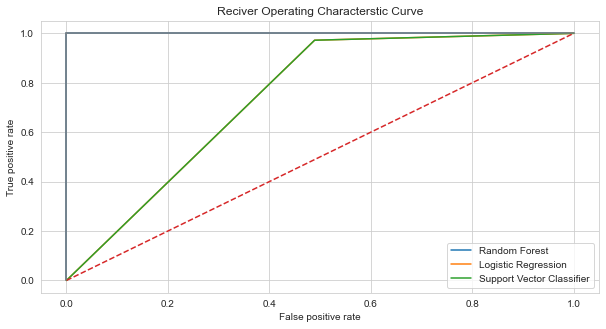

In [49]:
# Saving the confusion matrix result by using the roc_curve function
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_train,rf_pred)
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_train,lr_pred)
svc_fpr,svc_tpr,svc_threshold = roc_curve(y_train,svm_pred)

# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_fpr,rf_tpr,label='Random Forest')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression')
plt.plot(svc_fpr,svc_tpr,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Model Random Forest memiliki 100% true positive rate dan 0% false positive rate. Diduga terjadinya overfitting pada model ini.

### Training Evaluation Scores

In [50]:
train_ev = pd.DataFrame({'Model': ['Random Forest','Logistic Regression','SVM'], 
                         'Accuracy_Score(%)': [accu_rf, accu_lr, accu_svm],
                         'F1_Score(%)': [f1_rf, f1_lr, f1_svm],
                         'Precision_Score(%)': [prec_rf, prec_lr, prec_svm],
                         'AUC_Score(%)': [auc_rf, auc_lr, auc_svm],
                        })
train_ev

,Model,Accuracy_Score(%),F1_Score(%),Precision_Score(%),AUC_Score(%)
0,Random Forest,100.000000,100.000000,100.000000,100.000000
1,Logistic Regression,89.816072,94.127696,97.220997,84.534036
2,SVM,89.816072,94.127696,97.220997,84.534036


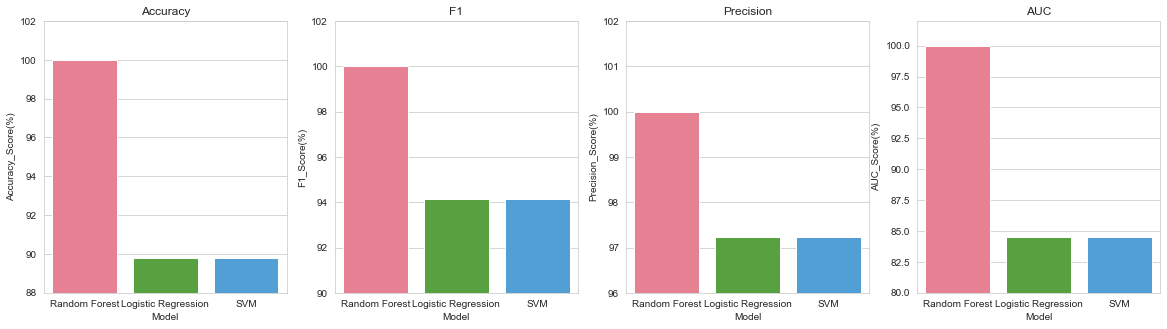

In [51]:
# Menampilkan grafik visualisasi tabel di atas
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Accuracy')
sns.barplot(data=train_ev, x='Model', y='Accuracy_Score(%)', palette='husl')
plt.ylim(88,102)
plt.subplot(1,4,2)
plt.title('F1')
sns.barplot(data=train_ev, x='Model', y='F1_Score(%)', palette='husl')
plt.ylim(90,102)
plt.subplot(1,4,3)
plt.title('Precision')
sns.barplot(data=train_ev, x='Model', y='Precision_Score(%)', palette='husl')
plt.ylim(96,102)
plt.subplot(1,4,4)
plt.title('AUC')
sns.barplot(data=train_ev, x='Model', y='AUC_Score(%)', palette='husl')
plt.ylim(80,102)
plt.show()

Model Random Forest memiliki score yang sempurna, baik itu dalam akurasi, nilai f1, precision, dan AUC score. Sedangkan kedua model lainnya memiliki score yang sama. Diduga terjadinya overfitting pada model Random Forest. Selanjutnya kita akan melakukan cross validation terhadap ketiga model ini.

## Model Improvement

### Hyperparameter Tuning with GridSearchCV
Menentukan range parameter yang akan diimplementasikan ke masing-masing model. Untuk proses cross validation, akan dipilih tipe scoring yang digunakan yaitu f1_score. F1 Score adalah rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan false positive dan false negative. Secara intuitif tidak semudah memahami akurasi, tetapi F1 biasanya lebih dapat diandalkan daripada akurasi, terutama jika kita memiliki distribusi data yang tidak merata (imbalanced data)

In [52]:
# Set grid search parameter untuk RandomForest
param_grid_forest = [ 
  {'rf__n_estimators': [200, 300],
   'rf__criterion': ['entropy', 'gini'], 
   'rf__max_depth': [4, 5]
   }
]

# Set grid search parameter untuk LogisticRegression
param_grid_lr = [
  {'lr__C': [0.1, 1, 10] 
   }
 ]

# Set grid search parameter untuk SVM
param_grid_svm = [
  {'svm__kernel': ['rbf'],
   'svm__C': [0.1, 1, 10] 
   }
 ]


In [53]:
# Construct grid search (Random Forest)
gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=param_grid_forest,
                     scoring='f1',
                     cv=5, verbose=1, return_train_score=True)
# Fit using grid search
gs_rf.fit(X_train, y_train)
# Best accuracy
print('Best f1_score: %.2f' % gs_rf.best_score_)
# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best f1_score: 0.94

Best params:
 {'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__n_estimators': 200}


In [54]:
# Construct grid search (Logistic Regression)
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr,
            scoring='f1',
            cv=5, verbose=1, return_train_score = True)
# Fit using grid search
gs_lr.fit(X_train, y_train)
# Best accuracy
print('Best f1_score: %.2f' % gs_lr.best_score_)
# Best params
print('\nBest params:\n', gs_lr.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best f1_score: 0.94

Best params:
 {'lr__C': 0.1}


In [55]:
# Construct grid search (SVM)
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='f1',
            cv=5, verbose=1, return_train_score = True)
# Fit using grid search
gs_svm.fit(X_train, y_train)
# Best Score
print('Best f1_score: %.2f' % gs_svm.best_score_)
# Best params
print('\nBest params:\n', gs_svm.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best f1_score: 0.95

Best params:
 {'svm__C': 1, 'svm__kernel': 'rbf'}


## Training Model with Best Parameters
Selanjutnya, setelah didapatkan parameter terbaik dari tiap model, parameter ini akan kita gunakan untuk pengujian ulang model terhadap data train

In [56]:
# Pipelines with the best params from GridSearchCV
pipe1 = gs_rf.best_estimator_

pipe2 = gs_lr.best_estimator_

pipe3 = gs_svm.best_estimator_

In [57]:
# Random Forest 
pipe1.fit(X_train, y_train)
rf_pred_final = pipe1.predict(X_train)
accu_rf_final = accuracy_score(rf_pred_final, y_train) * 100
f1_rf_final = f1_score(rf_pred_final, y_train) *100
prec_rf_final = precision_score(rf_pred_final,y_train) * 100
auc_rf_final = roc_auc_score(rf_pred_final, y_train) *100
clf_report_rf_final = classification_report(y_train, rf_pred_final)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_rf_final))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_rf_final))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_rf_final))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_rf_final))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report_rf_final)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 89.48%
---------------------------------------------------------------------------------
F1 SCORE        : 94.08%
---------------------------------------------------------------------------------
PRECISION SCORE : 99.46%
---------------------------------------------------------------------------------
AUC SCORE       : 91.08%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.93      0.37      0.53      1300
           1       0.89      0.99      0.94      6801

    accuracy                           0.89      8101
   macro avg       0.91      0.68      0.74      8101
weighted avg       0.90      0.89      0.88      8101



In [58]:
# Logistic Regression
pipe2.fit(X_train, y_train)
lr_pred_final = pipe2.predict(X_train)
accu_lr_final = accuracy_score(lr_pred_final, y_train) * 100
f1_lr_final = f1_score(lr_pred_final, y_train) *100
prec_lr_final = precision_score(lr_pred_final,y_train) * 100
auc_lr_final = roc_auc_score(lr_pred_final, y_train) *100
clf_report_lr_final = classification_report(y_train, lr_pred_final)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_lr_final))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_lr_final))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_lr_final))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_lr_final))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report_lr_final)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 89.85%
---------------------------------------------------------------------------------
F1 SCORE        : 94.15%
---------------------------------------------------------------------------------
PRECISION SCORE : 97.34%
---------------------------------------------------------------------------------
AUC SCORE       : 84.81%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.78      0.51      0.62      1300
           1       0.91      0.97      0.94      6801

    accuracy                           0.90      8101
   macro avg       0.85      0.74      0.78      8101
weighted avg       0.89      0.90      0.89      8101



In [59]:
# SVM
pipe3.fit(X_train, y_train)
svm_pred_final = pipe3.predict(X_train)
accu_svm_final = accuracy_score(svm_pred_final, y_train) * 100
f1_svm_final = f1_score(svm_pred_final, y_train) *100
prec_svm_final = precision_score(svm_pred_final,y_train) * 100
auc_svm_final = roc_auc_score(svm_pred_final, y_train) *100
clf_report_svm_final = classification_report(svm_pred_final, y_train)
print("=================================================================================")
print("TRAINING RESULTS: \n=================================================================================")
print("ACCURACY SCORE  : {0:.2f}%".format(accu_svm_final))
print("---------------------------------------------------------------------------------")
print("F1 SCORE        : {0:.2f}%".format(f1_svm_final))
print("---------------------------------------------------------------------------------")
print("PRECISION SCORE : {0:.2f}%".format(prec_svm_final))
print("---------------------------------------------------------------------------------")
print("AUC SCORE       : {0:.2f}%".format(auc_svm_final))
print("---------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT :\n', clf_report_svm_final)
print("=================================================================================")

TRAINING RESULTS: 
ACCURACY SCORE  : 93.05%
---------------------------------------------------------------------------------
F1 SCORE        : 95.96%
---------------------------------------------------------------------------------
PRECISION SCORE : 98.38%
---------------------------------------------------------------------------------
AUC SCORE       : 91.08%
---------------------------------------------------------------------------------
CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       957
           1       0.98      0.94      0.96      7144

    accuracy                           0.93      8101
   macro avg       0.82      0.91      0.86      8101
weighted avg       0.94      0.93      0.93      8101



# Model Evaluation

In [60]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Logistic Regression','SVM'], 
                         'Accuracy_Score(%)': [accu_rf_final, accu_lr_final, accu_svm_final],
                         'F1_Score(%)': [f1_rf_final, f1_lr_final, f1_svm_final],
                         'Precision_Score(%)': [prec_rf_final, prec_lr_final, prec_svm_final],
                         'AUC_Score(%)': [auc_rf_final, auc_lr_final, auc_svm_final],
                        })
model_ev

,Model,Accuracy_Score(%),F1_Score(%),Precision_Score(%),AUC_Score(%)
0,Random Forest,89.482780,94.075104,99.455962,91.079240
1,Logistic Regression,89.853105,94.154459,97.338627,84.812198
2,SVM,93.050241,95.962711,98.382591,91.082381


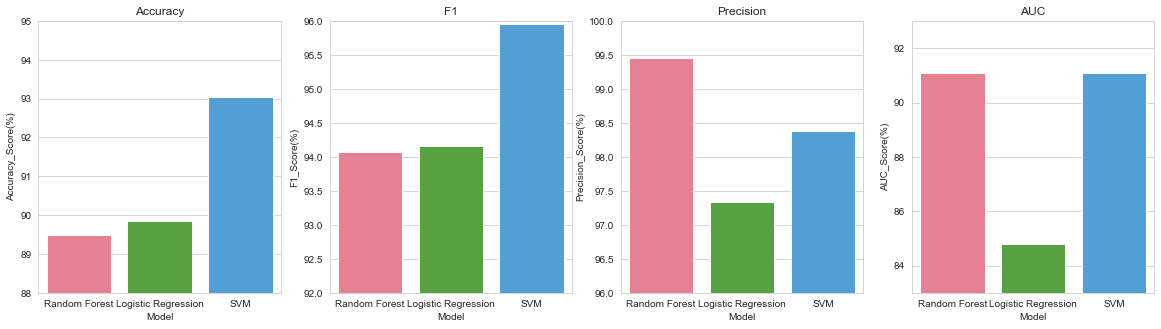

In [61]:
# Menampilkan grafik untuk visualisasi tabel di atas
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Accuracy')
sns.barplot(data=model_ev, x='Model', y='Accuracy_Score(%)', palette='husl')
plt.ylim(88,95)
plt.subplot(1,4,2)
plt.title('F1')
sns.barplot(data=model_ev, x='Model', y='F1_Score(%)', palette='husl')
plt.ylim(92,96)
plt.subplot(1,4,3)
plt.title('Precision')
sns.barplot(data=model_ev, x='Model', y='Precision_Score(%)', palette='husl')
plt.ylim(96,100)
plt.subplot(1,4,4)
plt.title('AUC')
sns.barplot(data=model_ev, x='Model', y='AUC_Score(%)', palette='husl')
plt.ylim(83,93)
plt.show()

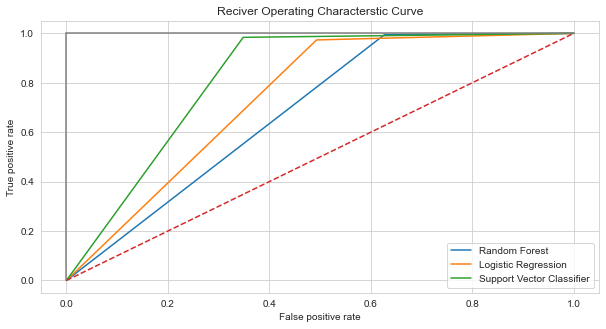

In [62]:
# Saving the confusion matrix result by using the roc_curve function
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_train,rf_pred_final)
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_train,lr_pred_final)
svc_fpr,svc_tpr,svc_threshold = roc_curve(y_train,svm_pred_final)

# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_fpr,rf_tpr,label='Random Forest')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression')
plt.plot(svc_fpr,svc_tpr,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

- Setelah dilakukan cross validation dengan parameter tuning, ternyata model Random Forest tidak lagi mencapai nilai sempurna (dugaan overfitting di awal training model adalah benar).
- Model Random Forest unggul pada penilaian Precision dan AUC Score, tapi tidak berbeda jauh dengan SVM. Semakin tinggi AUC Score, semakin baik kinerja model dalam membedakan antara kelas positif dan negatif. Ketika AUC = 1 atau 100%, maka model classifier mampu membedakan dengan sempurna antara semua poin kelas Positif dan Negatif dengan benar.
- Namun, sepertinya nilai Recall dari model Random Forest yang terlalu kecil (diakibatkan tingginya nilai Precision) sehingga untuk F1 score dari Random Forest menjadi lebih kecil dibandingkan dengan SVM.
- Dilihat dari grafik ROC Curve, model SVM yang paling seimbang menjauhi garis merah

Dari hasil keseluruhan proses training model, model SVM akan kami pilih sebagai model terbaik dalam mempelajari dataset ini dan memberikan prediksi yang terbaik juga.

# Model Saving

In [63]:
# Menggabungkan pipeline untuk categorical feature dan untuk seluruh proses modelling
full_pipeline= Pipeline(steps=[
        ("cat_encoder", ct),
        ("modelling", pipe3)
    ])

full_pipeline.fit(X, y)
#full_pipeline.predict(some_data)

Pipeline(steps=[('cat_encoder',
                 ColumnTransformer(transformers=[('sex',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['Gender']),
                                                 ('edu',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['Education_Level']),
                                                 ('marriage',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['Marital_Status']),
                                                 ('income',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['Income_Category']),
                                                 ('card',
                                                

In [64]:
my_model = full_pipeline

In [65]:
# Menyimpan model dengan nama file 'ledom.pkl'
joblib.dump(my_model, "ledom.pkl") 

# Model Inference
Selanjutnya model terbaik yang telah dipilih, yaitu model SVM, akan digunakan untuk memprediksi data test yang telah kita persiapkan di awal pembagian data tadi

In [67]:
pred = pipe3.predict(X_test)

In [69]:
X_test.shape

(2026, 20)

In [68]:
X_test['result'] = pred
X_test['result'].value_counts()

1    1816
0     210
Name: result, dtype: int64

In [94]:
X_test[X_test['result']==0]

,Customer_Age,Dependent_count,Months_on_book,Rel_count,Months_inactive,Contacts_count,Credit_Limit,revolving,avg_open,amount_change,Total_Trans_Amt,Total_Trans_Ct,ct_change,util_ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,result
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
712050933,48,4,32,5,2,3,25190.0,0,25190.0,0.467,1533,41,0.323,0.000,1,0,1,3,0,0
713696808,46,3,39,3,3,0,1801.0,316,1485.0,0.494,2252,42,0.400,0.175,0,3,1,4,0,0
708708858,50,1,36,1,3,4,2422.0,502,1920.0,0.997,2548,46,0.484,0.207,0,2,2,4,0,0
757194408,43,3,36,2,3,3,1438.3,0,1438.3,0.539,1707,38,1.111,0.000,1,0,1,2,0,0
780078333,56,2,41,3,2,2,5887.0,659,5228.0,0.650,1193,26,0.300,0.112,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798041508,50,4,44,2,3,2,3201.0,2517,684.0,0.445,1880,42,0.355,0.786,0,2,2,4,0,0
713011683,37,3,24,4,2,4,11239.0,0,11239.0,0.320,2055,43,0.162,0.000,0,0,1,4,0,0
712563408,33,2,18,1,1,6,5600.0,2517,3083.0,0.628,2296,46,0.586,0.449,1,5,2,1,0,0


Dari 2026 data nasabah:
- Prediksi jumlah nasabah yang tetap (exist) : 1816 orang
- Prediksi jumlah nasabah yang akan beralih (attrited) : 210 orang

# Conclusion
1. Sebelum mulai dilakukan analisis terhadap dataset, terdapat proses cleaning data untuk mengisi missing value pada data, yaitu data yang bernilai 'Unknown'
2. Setelah dilakukan analisis, langkah pertama yang dilakukan untuk persiapan training model adalah encoding data yang bersifat kategorikal (non-numerik), lalu dipisahkan antara data untuk training dan untuk testing dengan proporsi 4:1.
3. Kemudian dengan bantuan pipeline yang berisikan scaler, PCA (untuk dimentional reduction), dan model estimator, proses data scaling dan pengurangan dimensi dapat berjalan secara terintegrasi sampai akhirnya data tersebut dilatih dengan model estimatornya.
4. Terdapat 3 model yang digunakan untuk training, yaitu RandomForestClassifier (RF), LogisticRegression (LR) dan Support Vector Classifier (SVC). Untuk hasil training pertama, RF meraih nilai akurasi (akurasi,f1,auc,precision) 100%, sedangkan LR dan SVC mencapai nilai yang sama di bawah itu. Namun setelah dilakukan cross validation dengan parameter tuning, SVC mencapai nilai tertinggi untuk akurasi dan f1-score. Sedangkan nilai tertinggi untuk Precision dan AUC score diraih oleh model RF (RF tidak lagi mencapai nilai 100% pada saat cross validation, diduga terjadi overfitting pada saat training model pertama).
5. Pada kasus ini, nilai positive(1) adalah kondisi dimana nasabah tetap tinggal, dan nilai negative(0) adalah kondisi dimana nasabah beralih. Metrics nilai yang menjadi concern adalah nilai precision, auc score, dan f1-score. Gambar di bawah ini merupakan tabel metric confusion matrix default dari sklearn. Prediksi yang lebih tidak diharapkan pada kasus ini adalah apabila seorang nasabah yang sebenarnya beralih (negative(0)), dideteksi sebagai nasabah yang tetap(positive(1)), atau dengan kata lain false positive. Sehingga nilai precision yang tinggi akan diharapkan sebagai acuan pada model untuk memprediksi.

<img alt="" class="qo tc fe fp fm fv v c" width="283" height="204" role="presentation" src="https://miro.medium.com/max/566/1*q2ozl-R0bxWXMwWmkERdsQ.png" srcset="https://miro.medium.com/max/552/1*q2ozl-R0bxWXMwWmkERdsQ.png 276w, https://miro.medium.com/max/566/1*q2ozl-R0bxWXMwWmkERdsQ.png 283w" sizes="283px">

6. Namun, dengan pertimbangan nilai recall nya yg jauh lebih kecil, sehingga nilai f1-score nya pun menjadi sedikit lebih jauh di bawah SVM (gap Precision Score = 1%, gap f1-score = 1,9%), dan juga dilihat dari visualisasi kurva ROC, maka selanjutnya model SVM dipilih sebagai model yang terbaik dalam melakukan prediksi pada kasus ini.